# Project Case Scenario

In [1]:
# Task 1: Familiarize Yourself with the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Load the dataset (adjust path accordingly)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
    "DIS", "RAD", "TAX", "PTRATIO", "LSTAT", "MEDV"
]

df = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Display the first few rows
print(df.head())

C:\Users\cafef\AppData\Local\Temp\ipykernel_21604\494432353.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names)


         CRIM    ZN  INDUS   CHAS    NOX    RM     AGE  DIS    RAD   TAX  \
0.00632  18.0  2.31      0  0.538  6.575  65.2  4.0900    1  296.0  15.3   
0.02731   0.0  7.07      0  0.469  6.421  78.9  4.9671    2  242.0  17.8   
0.02729   0.0  7.07      0  0.469  7.185  61.1  4.9671    2  242.0  17.8   
0.03237   0.0  2.18      0  0.458  6.998  45.8  6.0622    3  222.0  18.7   
0.06905   0.0  2.18      0  0.458  7.147  54.2  6.0622    3  222.0  18.7   

         PTRATIO  LSTAT  MEDV  
0.00632   396.90   4.98  24.0  
0.02731   396.90   9.14  21.6  
0.02729   392.83   4.03  34.7  
0.03237   394.63   2.94  33.4  
0.06905   396.90   5.33  36.2  


In [2]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0.00632 to 0.04741
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    int64  
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    int64  
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 55.3 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    11.363636   11.136779    0.069170    0.554695    6.284634   68.574901   
std     23.322453   

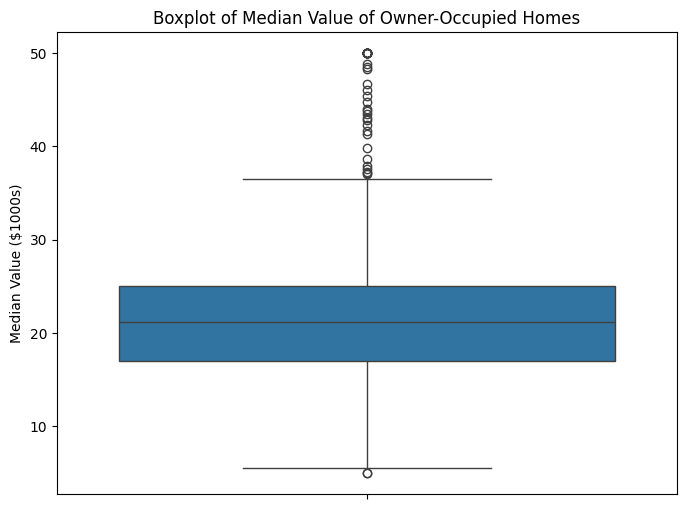

In [3]:
# Task 2: Generate Descriptive Statistics and Visualizations
plt.figure(figsize=(8, 6))
sns.boxplot(y="MEDV", data=df)
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Value ($1000s)")
plt.show()

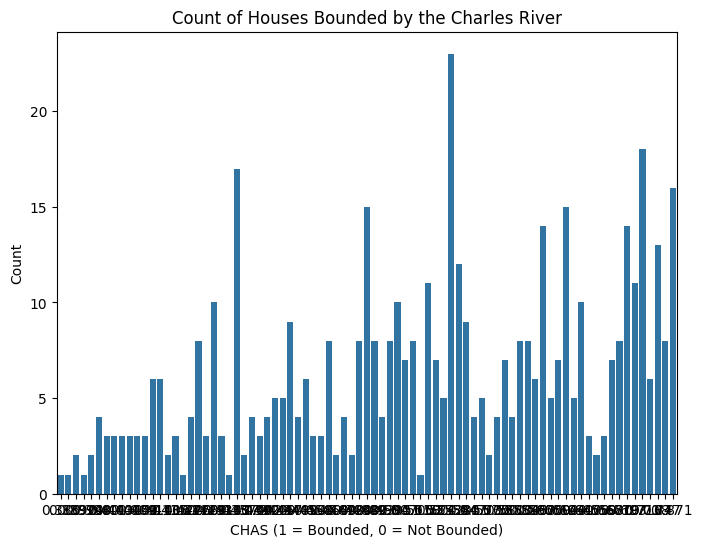

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x="CHAS", data=df)
plt.title("Count of Houses Bounded by the Charles River")
plt.xlabel("CHAS (1 = Bounded, 0 = Not Bounded)")
plt.ylabel("Count")
plt.show()

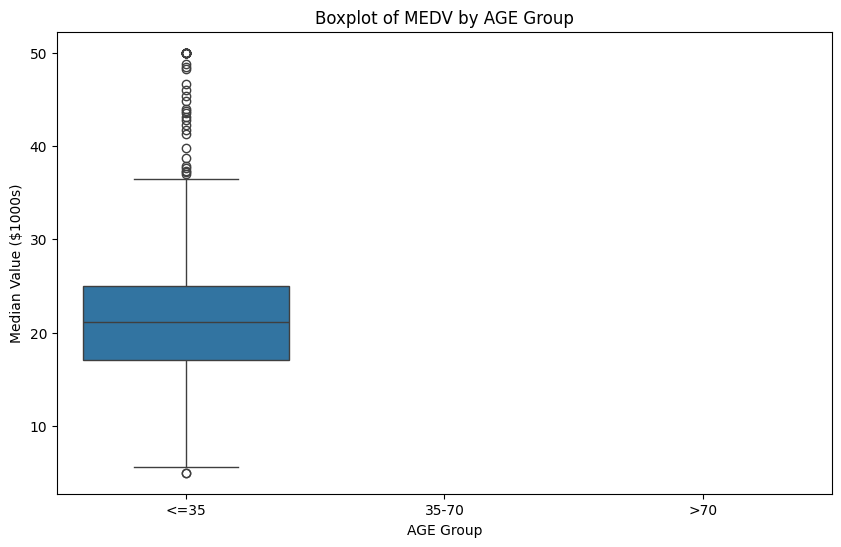

In [5]:
# Discretize AGE into categories
df['AGE_group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=["<=35", "35-70", ">70"])

plt.figure(figsize=(10, 6))
sns.boxplot(x="AGE_group", y="MEDV", data=df)
plt.title("Boxplot of MEDV by AGE Group")
plt.xlabel("AGE Group")
plt.ylabel("Median Value ($1000s)")
plt.show()

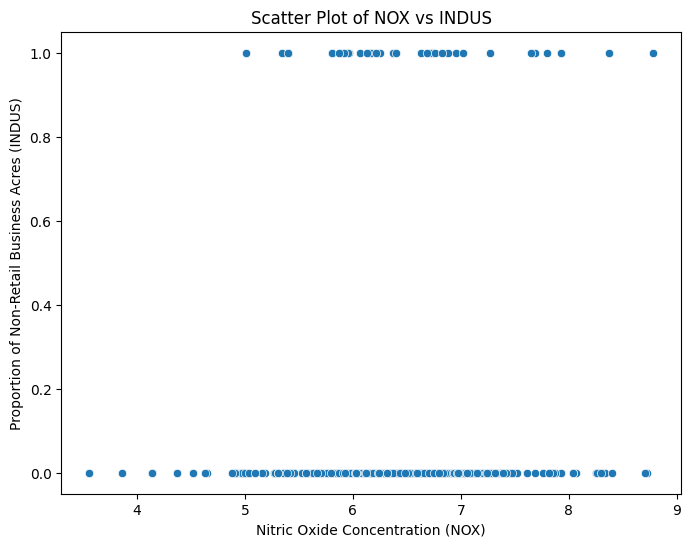

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="NOX", y="INDUS", data=df)
plt.title("Scatter Plot of NOX vs INDUS")
plt.xlabel("Nitric Oxide Concentration (NOX)")
plt.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.show()

In [7]:
# Task 3: Hypothesis Testing
chas1 = df[df["CHAS"] == 1]["MEDV"]
chas0 = df[df["CHAS"] == 0]["MEDV"]

t_stat, p_val = stats.ttest_ind(chas1, chas0)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: nan, P-value: nan


C:\Users\cafef\AppData\Local\Temp\ipykernel_21604\207945775.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = stats.ttest_ind(chas1, chas0)


In [8]:
group1 = df[df["AGE_group"] == "<=35"]["MEDV"]
group2 = df[df["AGE_group"] == "35-70"]["MEDV"]
group3 = df[df["AGE_group"] == ">70"]["MEDV"]

f_stat, p_val = stats.f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat}, P-value: {p_val}")

F-statistic: nan, P-value: nan


C:\Users\cafef\AppData\Local\Temp\ipykernel_21604\869205704.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = stats.f_oneway(group1, group2, group3)


In [9]:
corr, p_val = stats.pearsonr(df["NOX"], df["INDUS"])
print(f"Correlation: {corr}, P-value: {p_val}")

Correlation: 0.0912512250434566, P-value: 0.040184099295863474


In [10]:
X = df[["DIS"]]
y = df["MEDV"]

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient (Impact of DIS): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient (Impact of DIS): -0.40309539555253066
Intercept: 26.382128362272393
